<a href="https://colab.research.google.com/github/sarthakshukla74/HOUSE-PRICE-PREDICITON/blob/main/HOUSE_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()


In [3]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
print(housing.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [6]:
df=pd.DataFrame(data=housing.data,columns=housing.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [7]:
df['Price']=housing.target

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [10]:
df.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Price,0


**EDA**

In [11]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

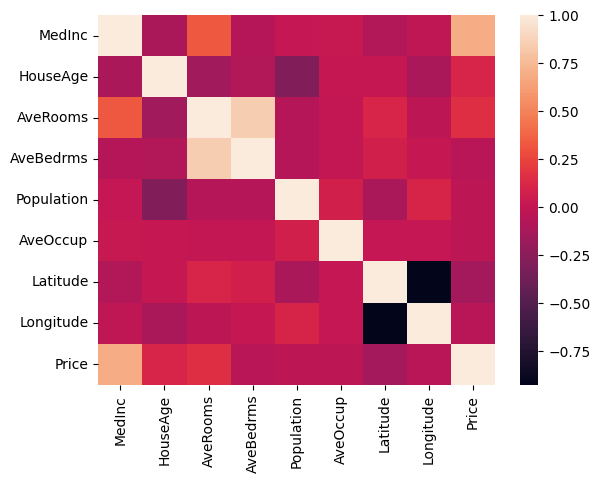

In [12]:
sns.heatmap(data=df.corr())

In [13]:
df.drop(columns=['AveRooms'],inplace=True)

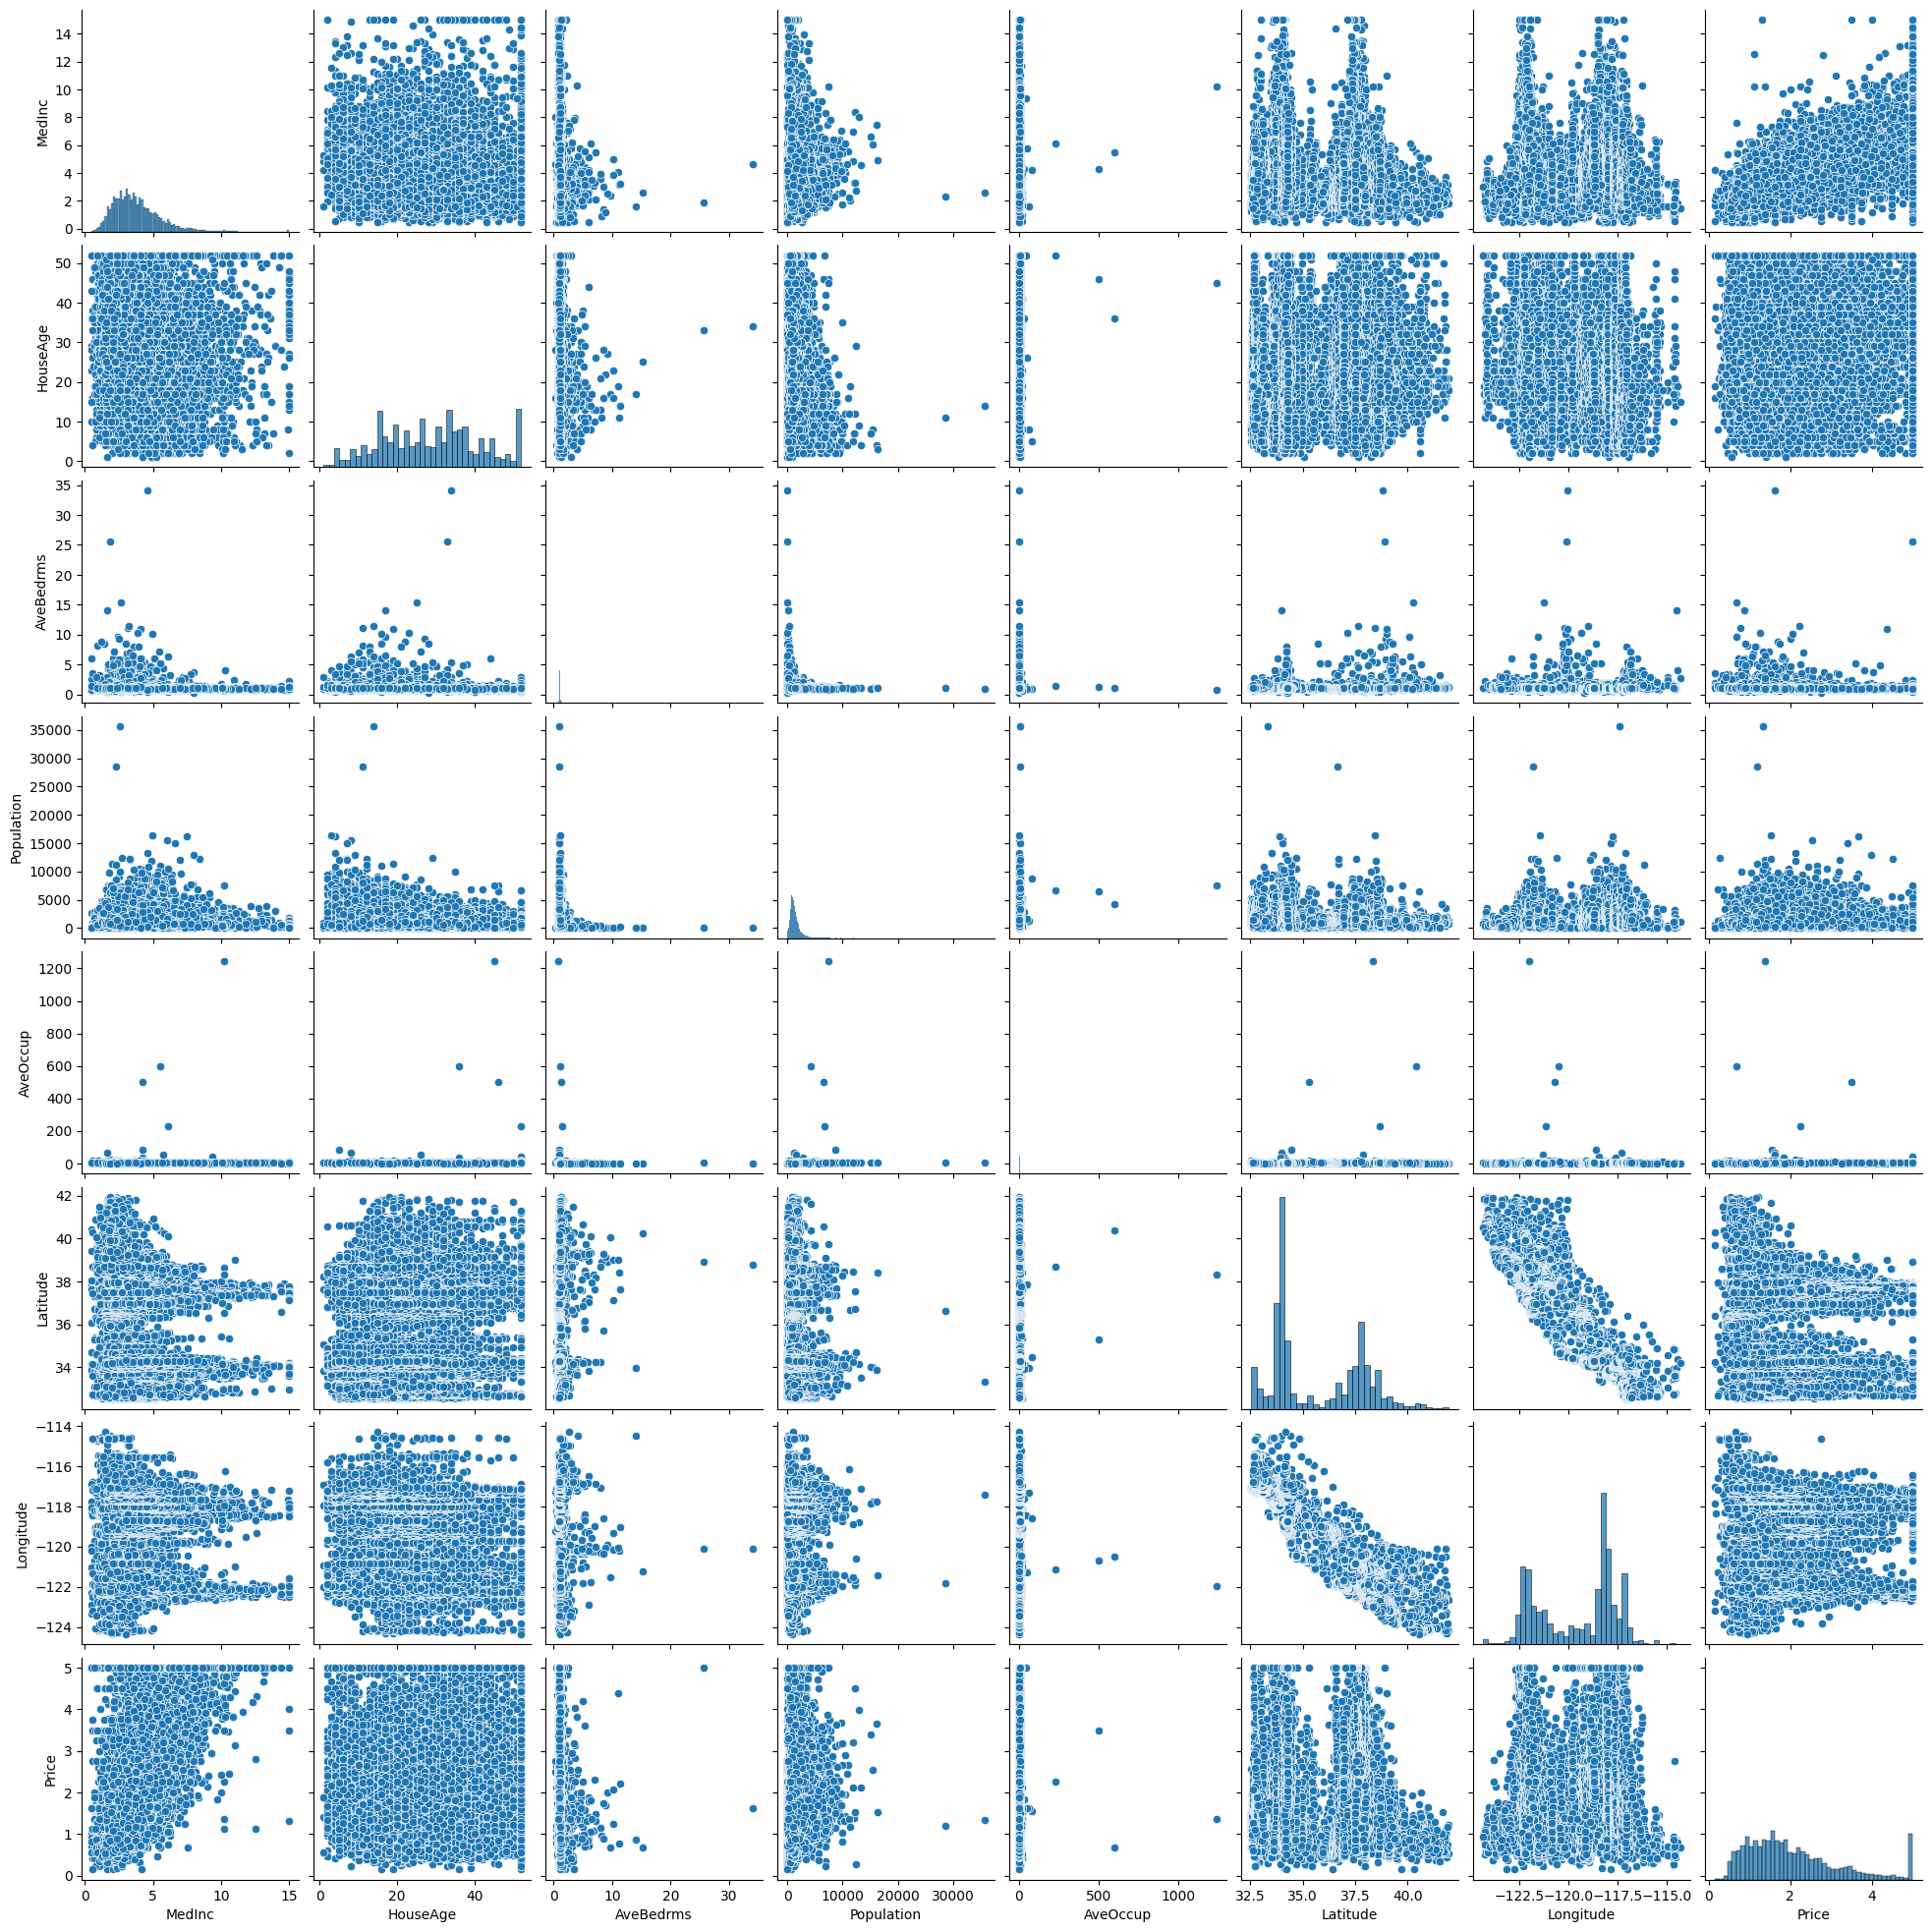

In [14]:
sns.pairplot(df)

<Axes: >

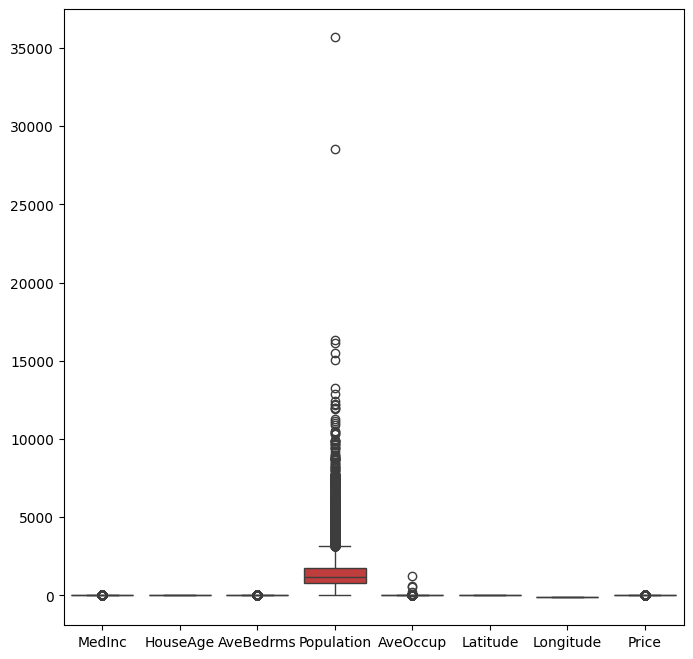

In [15]:
fig,ax=plt.subplots(figsize=(8,8))
sns.boxplot(data=df,ax=ax)

**CAPPING VALUES**

In [22]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_capped = df.copy() # Create a copy to avoid modifying the original DataFrame

for col in df_capped.columns:
    df_capped[col] = np.where(df_capped[col] < lower_bound[col], lower_bound[col], df_capped[col])
    df_capped[col] = np.where(df_capped[col] > upper_bound[col], upper_bound[col], df_capped[col])

print("Original DataFrame shape:", df.shape)
print("Capped DataFrame shape:", df_capped.shape)

Original DataFrame shape: (20640, 8)
Capped DataFrame shape: (20640, 8)


**REMOVING OUTLIERS**

In [18]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)

Original DataFrame shape: (20640, 8)
Cleaned DataFrame shape: (16365, 8)


<Axes: >

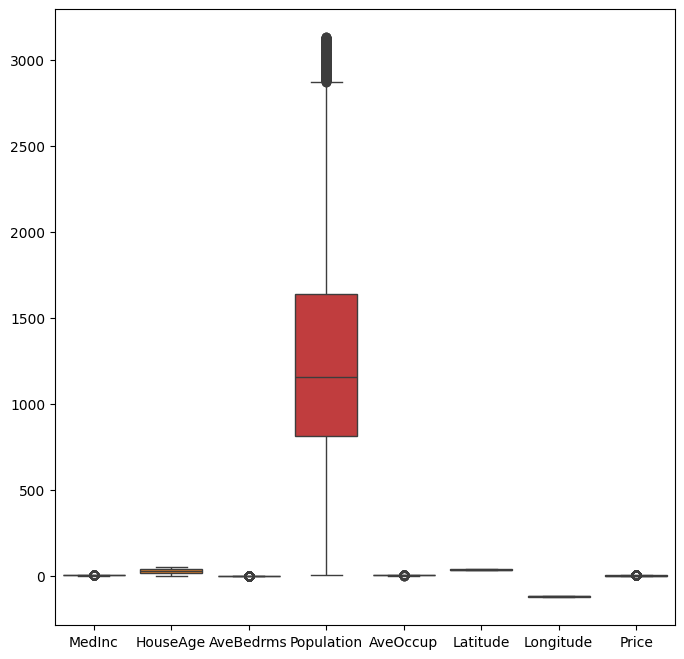

In [20]:
fig,ax=plt.subplots(figsize=(8,8))
sns.boxplot(data=df_cleaned,ax=ax)

<Axes: >

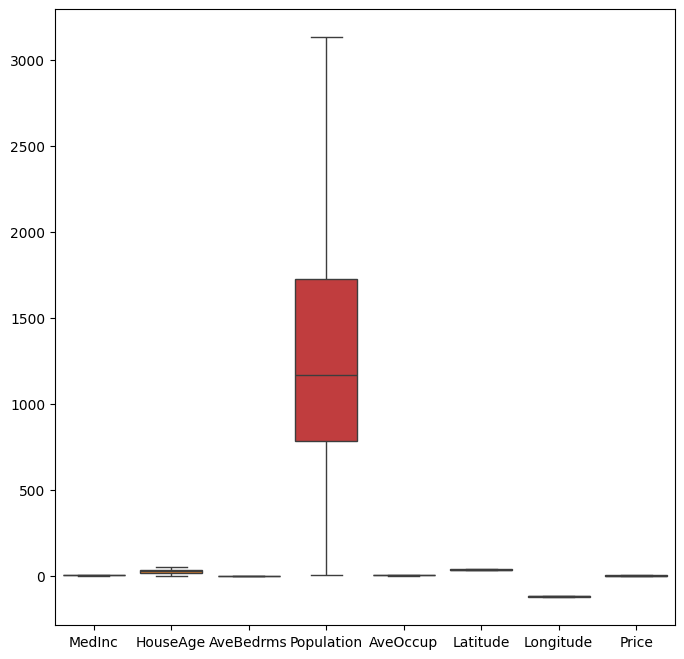

In [23]:
fig,ax=plt.subplots(figsize=(8,8))
sns.boxplot(data=df_capped,ax=ax)

**NORMALIZATION**



In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
normalized_df=scaler.fit_transform(df_capped)

**SPLITTING THE DATA**

In [25]:
features=df.iloc[:,:-1]
target=df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(features,target,test_size=0.3,random_state=42)

**NORMALISATION OF DATA POINTS**

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_norm=scaler.fit_transform(X_train)
X_test_norm=scaler.transform(X_test)

**MODEL TRAINING**

In [27]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train_norm,Y_train)

LinearRegression()

In [28]:
slope_values=model.coef_
intercept_value=model.intercept_

**MODEL PREDICTION**

In [29]:
reg_pred=model.predict(X_test_norm)

In [30]:
reg_pred

array([0.71756952, 1.77024257, 2.52931976, ..., 1.93591226, 1.59329639,
       1.6896271 ])

**CALCULATING RESIDUALS**

In [31]:
residuals=Y_test-reg_pred
residuals

,Price
20046,-0.240570
3024,-1.312243
15663,2.470690
20484,-0.686260
9814,0.069673
...,...
17505,0.187222
13512,-0.256607
10842,0.248088
16559,-0.399296


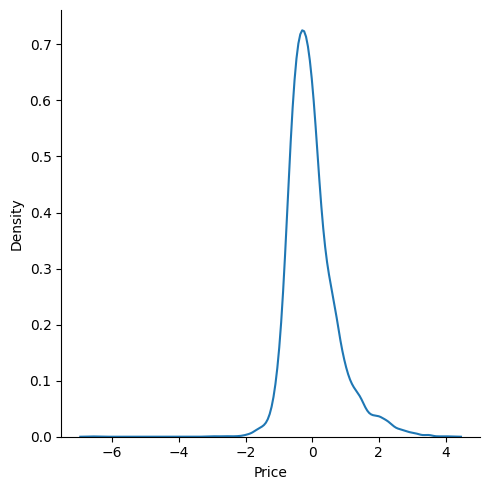

In [32]:
sns.displot(residuals,kind='kde')

**MODEL EVALUATION**

In [39]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(Y_test,reg_pred)
mae=mean_absolute_error(Y_test,reg_pred)
r2=r2_score(Y_test,reg_pred)
print(f'MSE:{mse}')
print(f'MAE:{mae}')
print(f'R2:{r2}')

MSE:0.5305540749343545
MAE:0.5349022220798466
R2:0.5957806761287979


**ADJUSTED R2 SCORE**

In [41]:
n=len(Y_test)
n_feature=X_test_norm.shape[1]
adjusted_r2=1-(1-r2)*(n-1)/(n-n_feature-1)
print(f'Adjusted R2:{adjusted_r2}')

Adjusted R2:0.5953231186793965


**CALCULATING RMSE**

In [42]:
rmse=np.sqrt(mse)
print(f'MSE:{mse}')
print(f'RMSE:{rmse}')

MSE:0.5305540749343545
RMSE:0.7283914297507588


**SAVING THE MODEL**

In [43]:
import pickle

In [44]:
pickle.dump(model,open('reg_model.pkl','wb'))

In [46]:
model=pickle.load(open('reg_model.pkl','rb'))